In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import norm, kstest

In [3]:
def plot_adtest(x, data, x_delay=False):
    """
    H0: dist1 = dist2
    AD statistic < critical value -->> accept H0
    ------
    x: 1d array (time, delay mode)
    data: 2d array (visibility, power)
    x_delay: is x axis delay? (default: False)
    ------
    Data matrix rows -->> time sample
    Data matrix columns -->> frequency/delay mode
    """

    if x_delay:
        data = np.transpose(data)
    
    # fit each dataset with a normal distribution
    mu = []
    std = []
    for i in range(len(data)):
        mu.append(norm.fit(data[i])[0])
        std.append(norm.fit(data[i])[1])
        
    # get cdf of each dataset
    cdf = []
    for i in range(len(data)):
        cdf.append(np.array(range(len(data[i])))/float(len(data[i])))
    
    # get cdf of each fit
    norm_cdf = []
    for i in range(len(data)):
        norm_cdf.append(norm.cdf(np.sort(data[i]), mu[i], std[i]))
    
    # perform AD test between each empirical dataset with its corresponding normal distribution
    # get a (AD statistic) and critical values
    a = []
    for i in range(len(data)):
        a.append(stats.anderson_ksamp([cdf[i], norm_cdf[i]])[0])
    cv = stats.anderson_ksamp([cdf[i], norm_cdf[i]])[1]
    
    # plot cdf if the number of datasets is small
    if len(data) < 16:
        plt.figure(figsize=(12, 12))
        for i in range(1, len(a)+1):
            plt.subplot(6, 4, i)
            i -= 1
            plt.plot(np.sort(data[i]), norm_cdf[i],'b--')
            plt.plot(np.sort(data[i]), cdf[i], 'r-')
            plt.grid()

    # plot AD test results
    plt.figure(figsize=(12,8))
    plt.plot(x, a, '-')
    for i in range(1, len(cv)+1):
        plt.plot(x, [cv[i-1] for i in range(len(x))], '--')
    labels = ["AD statistics", "1%", "2.5%", "5%", "10%", "15%"]
    plt.legend(labels, ncol=4, loc='best')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: p-value capped: true value larger than 0.25
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: p-value capped: true value larger than 0.25


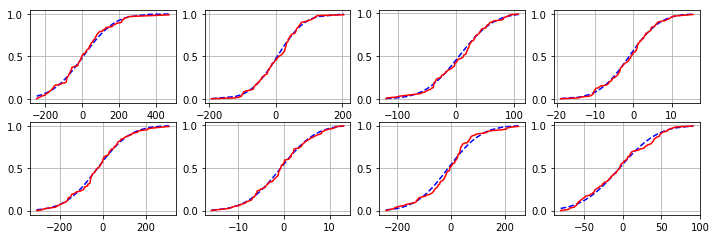

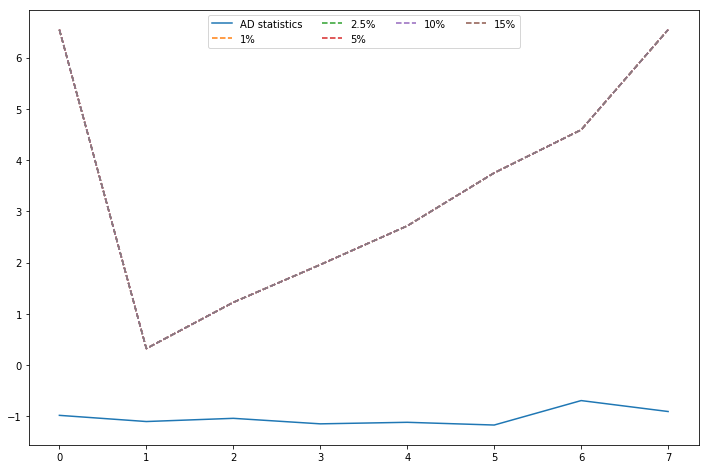

In [11]:
data = []
std = np.abs(np.random.normal(1, 100, 8))
for i in range(8):
    data.append(np.random.normal(0, std[i], 100))
x = np.linspace(0, len(data)-1, len(data))
plot_adtest(x, data)